## **What's the eigen-number of the MNIST dataset (PCA from scratch)**
The goal of this notebook is to apply PCA on the MNIST dataset in order to find its orthonormal basis (especially the first component). The PCA algorithm is implemented from scratch using numpy and tensorflow.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(X, y), (_, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("Training set shape:", X.shape)

Training set shape: (60000, 28, 28)


The MNIST dataset contains 60000 gray scale images 28x28 shaped of written digits from 0 to 9.

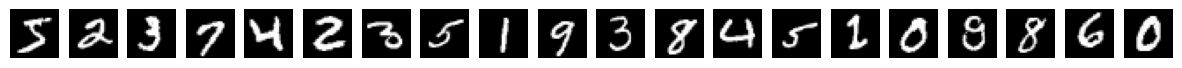

In [30]:
plt.figure(figsize=(15, 3))
for i, idx in enumerate(list(range(0, 100, 5)), 1):
    plt.subplot(1, 20, i)
    plt.imshow(X[idx], cmap='gray')
    plt.axis('off')

plt.show()

Let's check the distribution of the labels to see if the dataset is balanced.

Text(0.5, 1.0, 'Distribution of labels')

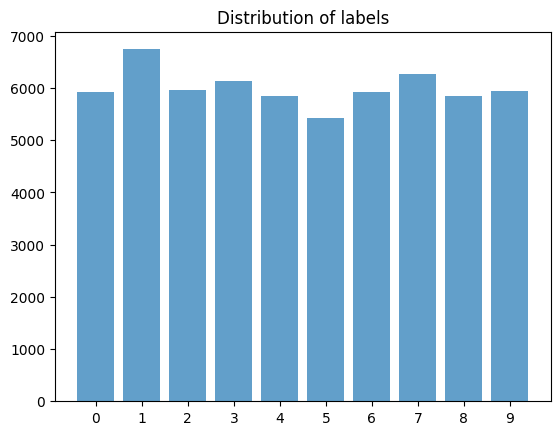

In [15]:
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center', alpha=0.7)
plt.xticks(labels)
plt.title('Distribution of labels')

As you can see, each label contains roughly 6000 images. The dataset is balanced and we can proceed to apply PCA.

In [16]:
#flatten the images
X_flatten = X.reshape(X.shape[0], -1)
print(f'We now have a matrix of shape{X_flatten.shape}')

We now have a matrix of shape(60000, 784)


Normalization of data is a crucial for the applciation of PCA. Although all the pixels have comparable range, I still scaled the images by deviding each pixel by its standard deviation.

In [20]:
#PCA Algorithm
import numpy as np

A = X_flatten.T  #transpose X_flatten to have a the images stored in columns
A = (A - np.mean(A, axis=0))/np.std(A, axis=0) #normalization
COV = np.dot(A, A.T) #compute the covariance matrix COV
print(f'The covariance matrix is of shape{COV.shape}')
U, S, V = np.linalg.svd(COV) #apply SVD decomposition
print(f'We now have a {U.shape[0]} eigenvectors of COV, each of shape {U.shape[0]}')

The covariance matrix is of shape(784, 784)
We now have a 784 eigenvectors of COV, each of shape 784


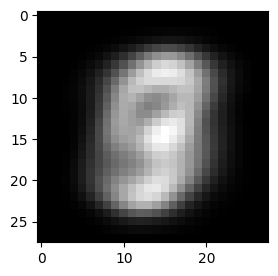

In [31]:
#Let's visualize the principal component of the MNIST dataset
principal_component = U[:, 0].reshape((28, 28)) #the principal component is the first column of U
plt.figure(figsize = (3, 3))
plt.imshow(principal_component, cmap = 'gray')


It appears that the first principal component roughly has a shape of an 8. In fact, this result can be intuitively anticipated. As one might see, the number 8 has the most intersections with the other numbers. In other simple words, 8 has three intersections with 1, probably a maximum with 3, etc.
We can visualize the other principal components, the orthogonality of the basis suggests that the second principal component should inculde information that is missing in the first component. One might suggest that it will have a shape close to 0.

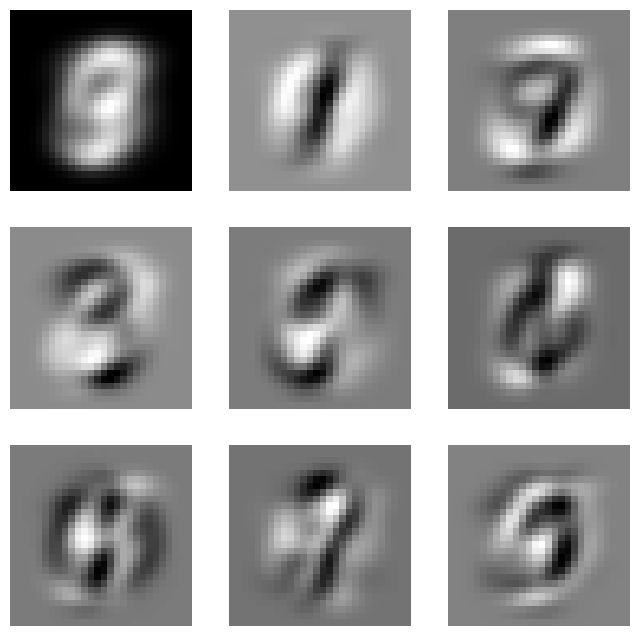

In [29]:
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
k = 0
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(U[:, k].reshape((28 , 28)), cmap='gray')
        axes[i, j].axis('off')
        k += 1
plt.show()